<a href="https://colab.research.google.com/github/Akash-sahay/Computer-Vision-for-underwater-UAV/blob/main/Color_correction_in_underwater_images.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

from PIL import Image

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
#flag =0 for RB Compensation via green channel and flag=1 for red compensation via green channel

def compensate_RB(image, flag):
    # splitting the components to RGB
    imageR, imageG, imageB = image.split()

    # getting maximum and minimum pixel values
    minR, maxR = imageR.getextrema()
    minG, maxG = imageG.getextrema()
    minB, maxB = imageB.getextrema()

    # convert to array
    imageR = np.array(imageR, np.float64)
    imageG = np.array(imageG, np.float64)
    imageB = np.array(imageB, np.float64)

    x, y = image.size  # Corrected: image.size returns a tuple (width, height)

    # normalizing pixel values to 0 to 1
    for i in range(0, y):
        for j in range(0, x):
            imageR[i, j] = (imageR[i, j] - minR) / (maxR - minR)
            imageG[i, j] = (imageG[i, j] - minG) / (maxG - minG)
            imageB[i, j] = (imageB[i, j] - minB) / (maxB - minB)

    # getting mean of each channel
    meanR = np.mean(imageR)
    meanG = np.mean(imageG)
    meanB = np.mean(imageB)

    # compensate red and blue channel
    if flag == 0:
        for i in range(y):
            for j in range(x):
                imageR[i][j] = int((imageR[i][j] + (meanG - meanR) * (1 - imageR[i][j]) * imageG[i][j]) * maxR)
                imageB[i][j] = int((imageB[i][j] + (meanG - meanB) * (1 - imageB[i][j]) * imageG[i][j]) * maxB)

    # compensate red channel only
    if flag == 1:
        for i in range(y):
            for j in range(x):
                imageR[i][j] = int((imageR[i][j] + (meanG - meanR) * (1 - imageR[i][j]) * imageG[i][j]) * maxR)

    # scaling the pixel values back to original range
    for i in range(0, y):
        for j in range(0, x):
            imageG[i][j] = int(imageG[i][j] * maxG)
            imageB[i][j] = int(imageB[i][j] * maxB)

    # create the compensated image
    compensatedIM = np.zeros((y, x, 3), dtype="uint8")
    compensatedIM[:, :, 0] = imageR
    compensatedIM[:, :, 1] = imageG
    compensatedIM[:, :, 2] = imageB
    compensatedIM = Image.fromarray(compensatedIM)

    return compensatedIM






In [ ]:
from google.colab import files

In [ ]:
# Upload the image
uploaded = files.upload()

# Load the image
image_path = list(uploaded.keys())[0]
image = Image.open(image_path)

Saving underwater image.jpg to underwater image.jpg


In [ ]:
compensated_image = compensate_RB(image, flag=0)
red_compensated_via_green_channel = compensate_RB(image, flag=1)

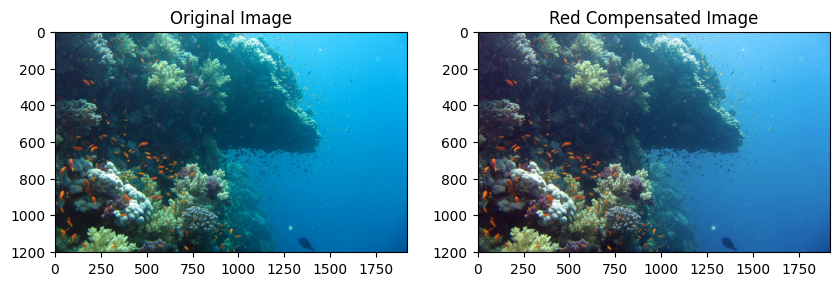

In [ ]:
# Display the original and compensated images
plt.figure(figsize=(10, 5))

# Original Image
plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(image)

# Compensated Image
plt.subplot(1, 2, 2)
plt.title("Compensated Image")
plt.imshow(compensated_image)

# Red Compensated Image
plt.subplot(1, 2, 2)
plt.title("Red Compensated Image")
plt.imshow(red_compensated_via_green_channel)

plt.show()

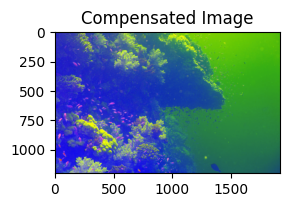

In [ ]:
# Compensated Image
plt.subplot(1, 2, 2)
plt.title("Compensated Image")
plt.imshow(compensated_image)

In [ ]:
#White balancing using grey world algorithm
def gray_world(image):
  imageR, imageG, imageB = image.split()
  #form a grayscale image
  imageGray = image.convert('L')

  # convert to array
  imageR = np.array(imageR, np.float64)
  imageG = np.array(imageG, np.float64)
  imageB = np.array(imageB, np.float64)
  imageGray = np.array(imageGray, np.float64)

  x, y = image.size
  meanR = np.mean(imageR)
  meanG = np.mean(imageG)
  meanB = np.mean(imageB)
  meanGray = np.mean(imageGray)
  #Gray world algorithm
  for i in range(0, y):
    for j in range(0, x):
      imageR[i][j] = int(imageR[i][j] * (meanGray / meanR))
      imageG[i][j] = int(imageG[i][j] * (meanGray / meanG))
      imageB[i][j] = int(imageB[i][j] * (meanGray / meanB))
  #create white balanced image
  whitebalancedIM = np.zeros((y,x,3), dtype="uint8")
  whitebalancedIM[:, :, 0] = imageR
  whitebalancedIM[:, :, 1] = imageG
  whitebalancedIM[:, :, 2] = imageB
  whitebalancedIM = Image.fromarray(whitebalancedIM)
  return whitebalancedIM






In [ ]:
white_balanced_image = gray_world(image)

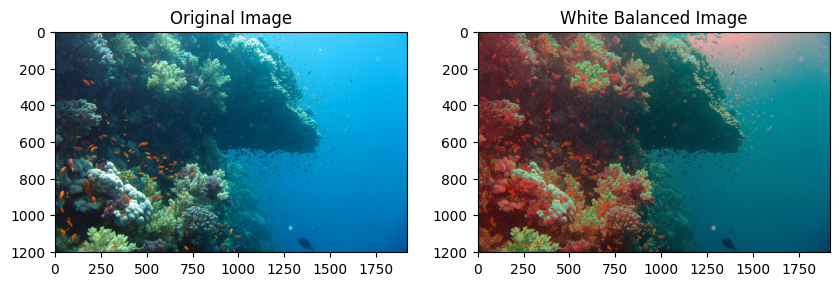

In [ ]:
# Display the original and compensated images
plt.figure(figsize=(10, 5))

# Original Image
plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(image)

# Compensated Image
plt.subplot(1, 2, 2)
plt.title("White Balanced Image")
plt.imshow(white_balanced_image)

plt.show()

In [ ]:
imager, imageg, imageb = image.split()

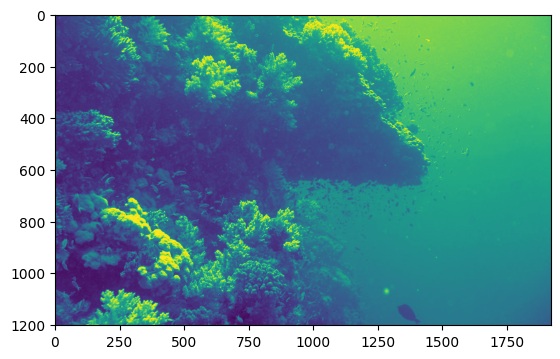

In [ ]:
plt.imshow(imageg)

In [ ]:
meanR = np.mean(imager)
meanG = np.mean(imageg)
meanB = np.mean(imageb)

In [ ]:
meanR, meanG, meanB

(28.936418035912368, 111.53260364669994, 137.47217311425402)

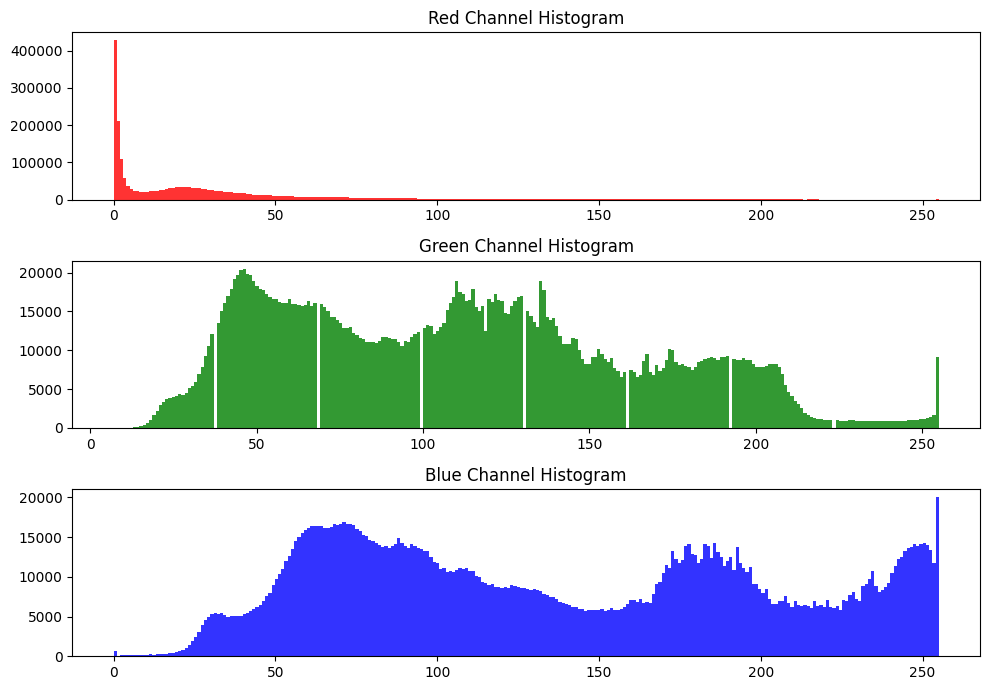

In [ ]:
# Convert the channels to NumPy arrays
imager = np.array(imager)
imageg = np.array(imageg)
imageb = np.array(imageb)

# Plot the histograms
plt.figure(figsize=(10, 7))

# Red channel histogram
plt.subplot(3, 1, 1)
plt.hist(imager.ravel(), bins=256, color='red', alpha=0.8)
plt.title('Red Channel Histogram')

# Green channel histogram
plt.subplot(3, 1, 2)
plt.hist(imageg.ravel(), bins=256, color='green', alpha=0.8)
plt.title('Green Channel Histogram')

# Blue channel histogram
plt.subplot(3, 1, 3)
plt.hist(imageb.ravel(), bins=256, color='blue', alpha=0.8)
plt.title('Blue Channel Histogram')

plt.tight_layout()
plt.show()


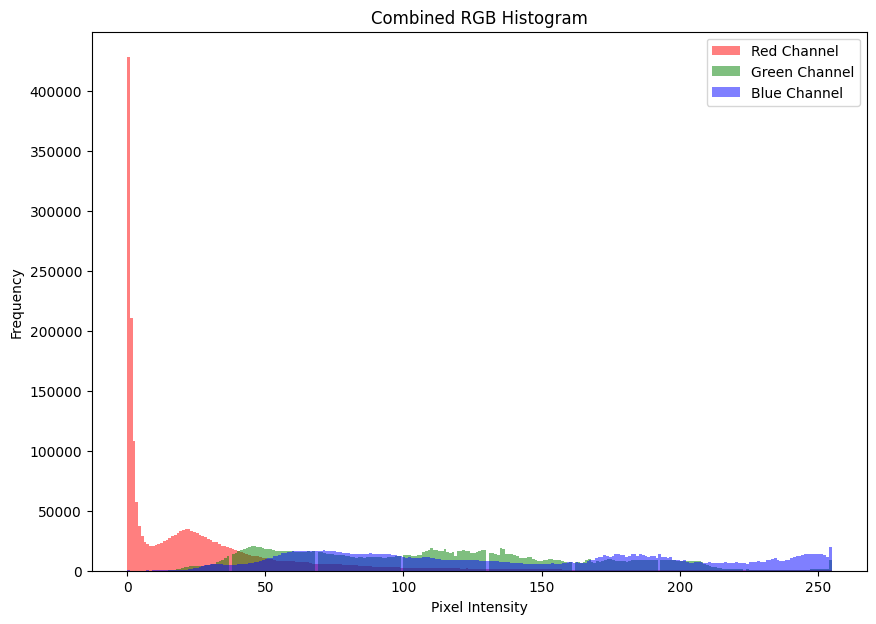

In [ ]:
# Plot the combined histogram
plt.figure(figsize=(10, 7))

plt.hist(imager.ravel(), bins=256, color='red', alpha=0.5, label='Red Channel')
plt.hist(imageg.ravel(), bins=256, color='green', alpha=0.5, label='Green Channel')
plt.hist(imageb.ravel(), bins=256, color='blue', alpha=0.5, label='Blue Channel')

plt.title('Combined RGB Histogram')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.legend()
plt.show()

Channel Analysis to find the Least degraded channel

In [ ]:
from skimage.filters import sobel
from scipy.stats import entropy
# Calculate entropy for each channel
entropy_r = entropy(imager.ravel(), base=2)
entropy_g = entropy(imageg.ravel(), base=2)
entropy_b = entropy(imageb.ravel(), base=2)

In [ ]:
entropy_r, entropy_g, entropy_b

(20.079028587396788, 20.968279518353373, 20.96046911923177)

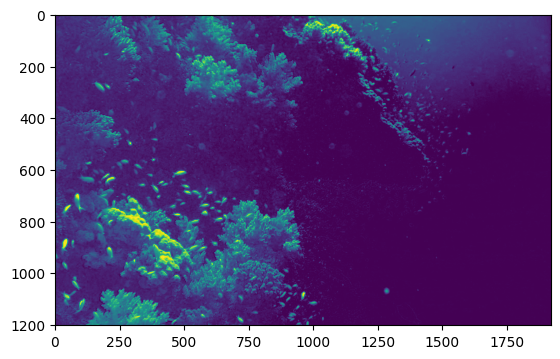

In [ ]:
plt.imshow(imager)



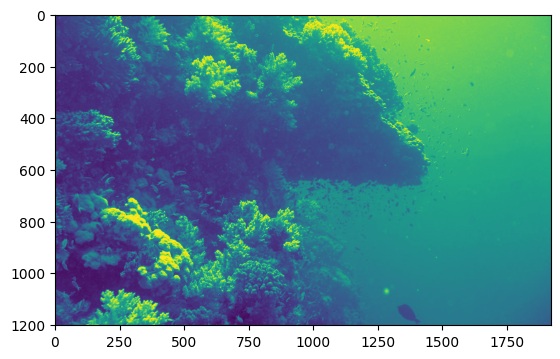

In [ ]:
plt.imshow(imageg)


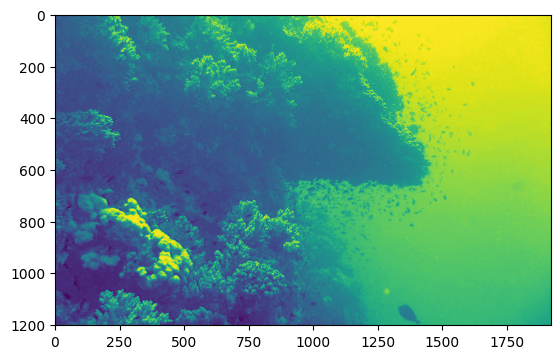

In [ ]:
plt.imshow(imageb)

In [ ]:
# Edge detection using Sobel filter
edgesr = sobel(imager)
edgesg = sobel(imageg)
edgesb = sobel(imageb)

# Calculate the number of edges (or the sum of edge strengths)
edge_strength_R = np.sum(edgesr)
edge_strength_G = np.sum(edgesg)
edge_strength_B = np.sum(edgesb)

# Print the edge strengths
print("Edge strength for Red channel:", edge_strength_R)
print("Edge strength for Green channel:", edge_strength_G)
print("Edge strength for Blue channel:", edge_strength_B)

Edge strength for Red channel: 56044.73526587349
Edge strength for Green channel: 55283.66338821405
Edge strength for Blue channel: 53835.705051879064


In [ ]:
# Calculate the standard deviation (noise level) for each channel
std_dev_R = np.std(imager)
std_dev_G = np.std(imageg)
std_dev_B = np.std(imageb)

# Calculate the mean intensity for each channel
mean_R = np.mean(imager)
mean_G = np.mean(imageg)
mean_B = np.mean(imageb)

# Calculate the Signal-to-Noise Ratio (SNR) for each channel
snr_R = mean_R / std_dev_R
snr_G = mean_G / std_dev_G
snr_B = mean_B / std_dev_B

print(f"Red Channel - Standard Deviation (Noise Level): {std_dev_R}, Mean: {mean_R}, SNR: {snr_R}")
print(f"Green Channel - Standard Deviation (Noise Level): {std_dev_G}, Mean: {mean_G}, SNR: {snr_G}")
print(f"Blue Channel - Standard Deviation (Noise Level): {std_dev_B}, Mean: {mean_B}, SNR: {snr_B}")


Red Channel - Standard Deviation (Noise Level): 39.113958918281945, Mean: 28.936418035912368, SNR: 0.739797730430898
Green Channel - Standard Deviation (Noise Level): 53.49035058345357, Mean: 111.53260364669994, SNR: 2.0850976378008794
Blue Channel - Standard Deviation (Noise Level): 66.74340895343897, Mean: 137.47217311425402, SNR: 2.0597115920488314


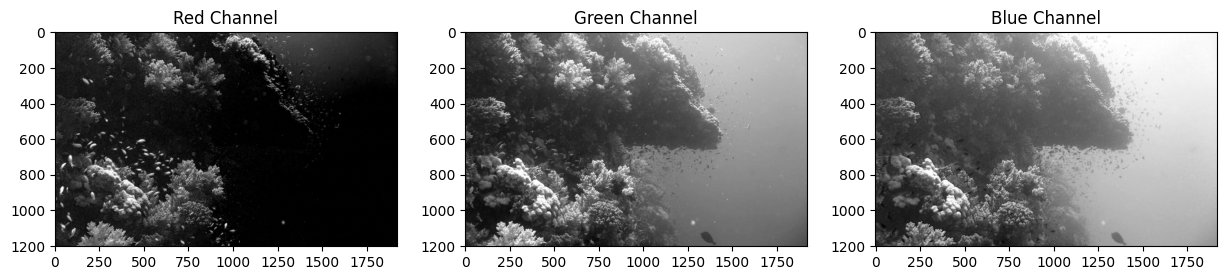

In [ ]:
# Visualize the channels
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(imager, cmap='gray')
plt.title('Red Channel')

plt.subplot(1, 3, 2)
plt.imshow(imageg, cmap='gray')
plt.title('Green Channel')

plt.subplot(1, 3, 3)
plt.imshow(imageb, cmap='gray')
plt.title('Blue Channel')

plt.show()


In [ ]:
# Upload the image
uploaded = files.upload()

# Load the image
image_path = list(uploaded.keys())[0]
image_pipe = Image.open(image_path)

Saving frames- raw video00961.jpg to frames- raw video00961.jpg


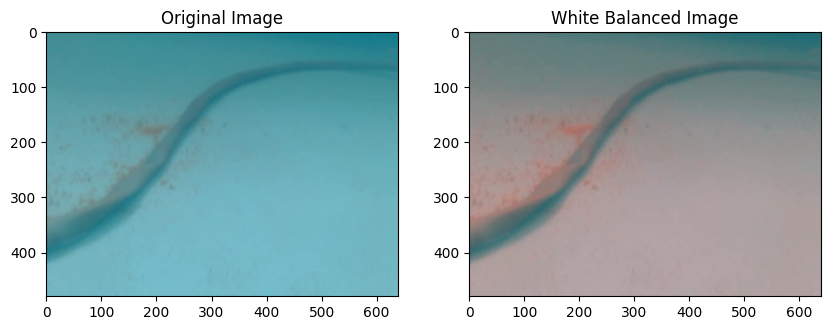

In [ ]:
white_balanced_image_pipe = gray_world(image_pipe)
# Display the original and compensated images
plt.figure(figsize=(10, 5))

# Original Image
plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(image_pipe)

# Compensated Image
plt.subplot(1, 2, 2)
plt.title("White Balanced Image")
plt.imshow(white_balanced_image_pipe)

plt.show()